# SVM-[Support Vector Machines]
## Problem Statement
### Predict if a customer subscribes to a term deposits or not, when contacted by a marketing agent, by understanding the different features and performing predictive analytics . 

### 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import svm
from sklearn import metrics
%matplotlib inline

### 2. Importing Data

In [2]:
df=pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 3. EDA

In [4]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
34456,24,services,single,high.school,no,no,no,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
262,42,technician,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
17661,57,retired,single,unknown,unknown,yes,yes,cellular,jul,mon,...,6,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3943,47,services,married,unknown,unknown,yes,yes,telephone,may,mon,...,6,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
1060,40,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
19024,47,services,married,high.school,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,yes
39476,85,housemaid,married,basic.4y,unknown,yes,no,cellular,apr,tue,...,1,6,2,success,-1.8,93.749,-34.6,0.642,5008.7,yes
9568,46,self-employed,divorced,basic.9y,no,yes,no,telephone,jun,mon,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
16652,42,self-employed,married,university.degree,no,no,no,telephone,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
38496,42,management,married,university.degree,no,no,no,telephone,oct,tue,...,1,3,1,success,-3.4,92.431,-26.9,0.728,5017.5,yes


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


<AxesSubplot:xlabel='job', ylabel='count'>

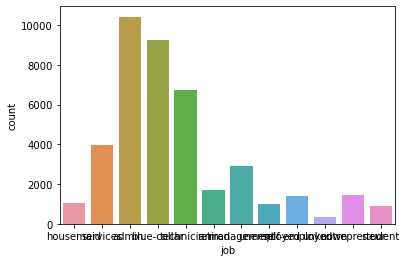

In [7]:
sns.countplot(x="job",data=df)

<AxesSubplot:xlabel='y', ylabel='count'>

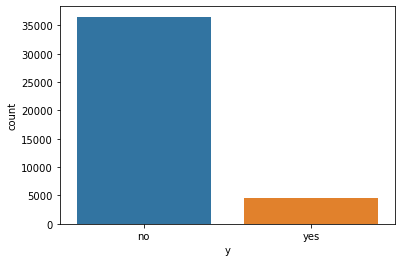

In [8]:
sns.countplot(x="y",data=df)

In [9]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<AxesSubplot:>

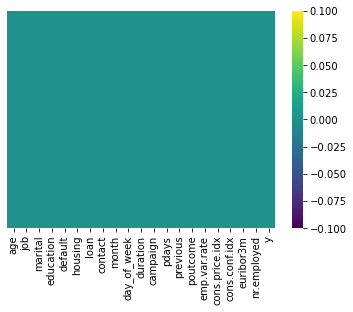

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:>

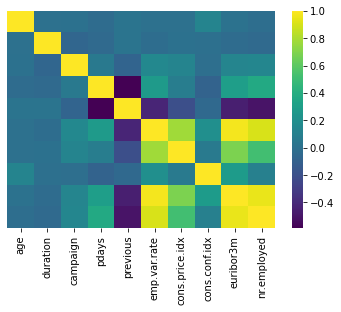

In [12]:
sns.heatmap(df.corr(),yticklabels=False,cmap="viridis")

In [13]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [15]:
df.shape

(41188, 21)

In [16]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [19]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [20]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [21]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [22]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [23]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [24]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [25]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [26]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [27]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [28]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [29]:
Encoded_Data = {'job':{'housemaid':0, 'services':1, 'admin.':2, 'blue-collar':3, 'technician':4,
       'retired':5, 'management':6, 'unemployed':7, 'self-employed':8, 'unknown':9,
       'entrepreneur':10, 'student':11},
                'marital':{'married':0, 'single':1, 'divorced':2, 'unknown':3},
                'education':{'basic.4y':0, 'high.school':1, 'basic.6y':2, 'basic.9y':3,
       'professional.course':4, 'unknown':5, 'university.degree':6,
       'illiterate':7},
                'default':{'no':0, 'unknown':2, 'yes':1},
                'housing':{'no':0, 'unknown':2, 'yes':1},
                'loan':{'no':0, 'unknown':2, 'yes':1},
                'contact':{'telephone':1, 'cellular':1},
                'month':{'may':0, 'jun':1, 'jul':2, 'aug':3, 'oct':4, 'nov':5, 'dec':6, 'mar':7, 'apr':8,
       'sep':9},
                'day_of_week':{'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4},
                'poutcome':{'nonexistent':0, 'failure':1, 'success':2},
                'y':{'no':0, 'yes':1}}
                

In [30]:
Encoded_Data

{'job': {'housemaid': 0,
  'services': 1,
  'admin.': 2,
  'blue-collar': 3,
  'technician': 4,
  'retired': 5,
  'management': 6,
  'unemployed': 7,
  'self-employed': 8,
  'unknown': 9,
  'entrepreneur': 10,
  'student': 11},
 'marital': {'married': 0, 'single': 1, 'divorced': 2, 'unknown': 3},
 'education': {'basic.4y': 0,
  'high.school': 1,
  'basic.6y': 2,
  'basic.9y': 3,
  'professional.course': 4,
  'unknown': 5,
  'university.degree': 6,
  'illiterate': 7},
 'default': {'no': 0, 'unknown': 2, 'yes': 1},
 'housing': {'no': 0, 'unknown': 2, 'yes': 1},
 'loan': {'no': 0, 'unknown': 2, 'yes': 1},
 'contact': {'telephone': 1, 'cellular': 1},
 'month': {'may': 0,
  'jun': 1,
  'jul': 2,
  'aug': 3,
  'oct': 4,
  'nov': 5,
  'dec': 6,
  'mar': 7,
  'apr': 8,
  'sep': 9},
 'day_of_week': {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4},
 'poutcome': {'nonexistent': 0, 'failure': 1, 'success': 2},
 'y': {'no': 0, 'yes': 1}}

In [31]:
df=df.replace(Encoded_Data)

In [32]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,1,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,2,0,0,1,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,1,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,1,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,1,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,6,0,1,0,1,5,4,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


### Encoding Done

### Without Scaling

### 4.,5. X & Y

In [33]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

### 6. SVM Model Build

In [35]:
SVM = svm.SVC(kernel='linear',gamma='auto')

### 7. Fit

In [36]:
SVM.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(gamma='auto', kernel='linear')

### 8. Accuracy

In [37]:
SVM.score(x_train,y_train)

0.8998179059180577

In [38]:
SVM.score(x_test,y_test)

0.9048312697256615

### With Standard Scaling

### 4.,5. X & Y

In [39]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [40]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.53303429, -1.49696895, -0.73285818, ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323, -1.08948536, -0.73285818, ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564, -1.08948536, -0.73285818, ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.540449  , -0.73285818, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  0.13296541, -0.73285818, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.540449  , -0.73285818, ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

### 6. SVM Model Build

In [42]:
SVM = svm.SVC(kernel='linear',gamma='auto')

### 7. Fit

In [43]:
SVM.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(gamma='auto', kernel='linear')

### 8. Accuracy

In [44]:
SVM.score(x_train,y_train)

0.898907435508346

In [45]:
SVM.score(x_test,y_test)

0.9002184996358339

### With Min Max Scaling

### 4.,5. X & Y

In [46]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [47]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.48148148, 0.        , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.09090909, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.09090909, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.45454545, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.36363636, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.45454545, 0.        , ..., 0.        , 0.08932215,
        0.        ]])

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

### 6. SVM Model Build

In [49]:
SVM = svm.SVC(kernel='linear',gamma='auto')

### 7. Fit

In [50]:
SVM.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(gamma='auto', kernel='linear')

### 8. Accuracy

In [51]:
SVM.score(x_train,y_train)

0.8977541729893779

In [52]:
SVM.score(x_test,y_test)

0.8982762806506434

### With Robust Scaling

### 4.,5. X & Y

In [53]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [54]:
scaler=RobustScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.2       , -1.5       ,  0.        , ...,  0.85714286,
         0.        ,  0.        ],
       [ 1.26666667, -1.        ,  0.        , ...,  0.85714286,
         0.        ,  0.        ],
       [-0.06666667, -1.        ,  0.        , ...,  0.85714286,
         0.        ,  0.        ],
       ...,
       [ 1.2       ,  1.        ,  0.        , ..., -1.42857143,
        -1.05861211, -1.7627907 ],
       [ 0.4       ,  0.5       ,  0.        , ..., -1.42857143,
        -1.05861211, -1.7627907 ],
       [ 2.4       ,  1.        ,  0.        , ..., -1.42857143,
        -1.05861211, -1.7627907 ]])

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

### 6. SVM Model Build

In [56]:
SVM = svm.SVC(kernel='linear',gamma='auto')

### 7. Fit

In [57]:
SVM.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(gamma='auto', kernel='linear')

### 8. Accuracy

In [58]:
SVM.score(x_train,y_train)

0.9

In [59]:
SVM.score(x_test,y_test)

0.9010682204418549

### Cross Validation

### Without Scaling

### 4.,5. X & Y

In [60]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

### 6. C[Finding the value of C]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
C_Values=list(range(1,50,2))
cv_scores=[]
for k in C_Values:
    SVM = svm.SVC(kernel='linear',gamma='auto',C=k)
    scores=cross_val_score(SVM,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [ ]:
MSE=[1-x for x in cv_scores]
MSE

In [ ]:
optimal_k=C_Values[MSE.index(min(MSE))]
optimal_k

In [ ]:
plt.plot(C_Values,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')